# Develop post-processing of radii

In [1]:
import skeliner as sk
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%timeit
mesh_path = './data/720575940560162277.obj'
mesh = sk.io.load_mesh(mesh_path)

In [3]:
%timeit
skel = sk.skeletonize(mesh=mesh)

In [4]:
%timeit
sk.post.calibrate_radii(skel=skel)

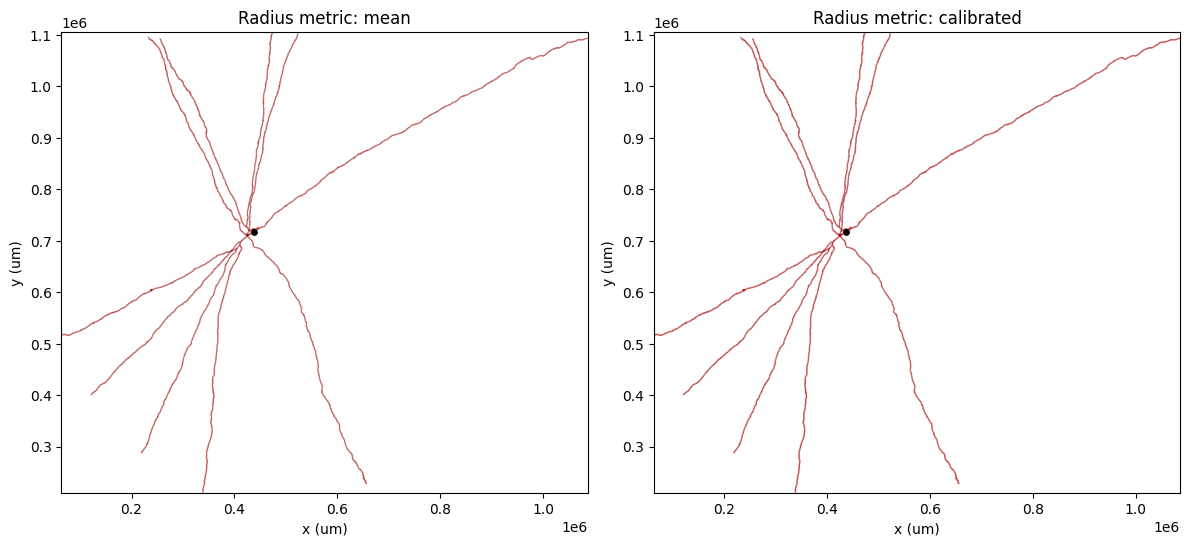

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
for i, metric in enumerate(['mean', 'calibrated']):
    ax = axs[i]
    sk.plot.projection(ax=ax, skel=skel, plane='xy', radius_metric=metric)
    ax.set_aspect('equal', 'box')

    ax.set_title(f"Radius metric: {metric}")

    ax.set_xlim(skel.nodes[:, 0].min() - 10, skel.nodes[:, 0].max() + 10)
    ax.set_ylim(skel.nodes[:, 1].min() - 10, skel.nodes[:, 1].max() + 10)

plt.show()

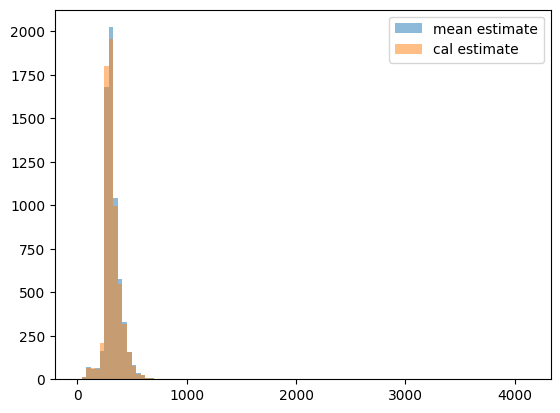

In [8]:
bins = np.linspace(0, np.max(skel.radii['mean']), 101)
plt.hist(skel.radii['mean'], alpha=0.5, bins=bins, label='mean estimate')
plt.hist(skel.radii['calibrated'], alpha=0.5, bins=bins, label='cal estimate')
plt.legend()
plt.show()